# Hands-on session 1

## Exercise 1: Storing regularly sampled data

For this exercise we will load data from the ``resources/D1S3`` folder. Use the ``load_intra_data`` (below) to load the data.

1. load the data
2. Try to figure out a few things about the data:
    1. What is stored?
    2. What is the sampling rate (or sampling interval)?
3. You may want to plot it to get an impression of the data.
    1. What might be the correct labeling of the plot?


In [1]:
import os
import scipy.io as spio

def load_intra_data():
    """
    Returns the time and the voltage vectors stored in the "intra_data.mat" file.

    Returns:
        time, voltage: the vectors containing time and measured voltage.
    """
    data = spio.loadmat(os.path.join("resources", "D1S3" , "intra_data.mat"))

    return data["time"][0], data["voltage"][0]

### Now we want to store the data in a nix file

1. Open a new file ("intracellular_data.nix")
2. Within the file create a **Block** with ``block = nixfile.create_block("test block", "test")``.
3. Within the ``block`` we create a **DataArray** ("intracellular data")
4. Append the dimension descriptor for the time axis.
5. Close the file to ensure proper saving (best practice).

### Your solution

In [4]:
import nixio
import numpy as np

In [42]:
time,voltage = load_intra_data()


2.5e-05

In [55]:
time,voltage = load_intra_data()
# sampling_interval = np.
dt = np.diff(time)[0]
duration = 10.0
# time = np.arange(0.0, duration, dt)

nixfile = nixio.File.open("intracellular_data.nix", nixio.FileMode.Overwrite)
block = nixfile.create_block("test block", "test")
array = block.create_data_array("voltage", "nix.data.sampled", data=voltage, label="voltage", unit="mV")
array.append_sampled_dimension(dt, label="time", unit="s")
nixfile.close()
# print("file format:", intra_data.format)
# print("nix data model version:", intra_data.version)

OSError: Unable to synchronously create file (unable to truncate a file which is already open)

## Exercise 2: reading data from the file and creating a fully labeled plot

1. Open the data file in ``ReadOnly`` mode (best practice).
2. Find the **Block**.
3. Find the **DataArray** that contains the data.
4. Read the data into a variable.
4. Get the dimension descriptor of the time-axis.
5. Get a time axis of the appropriate length 
6. Plot the data
7. label the x- and y-axis (you may want to use the function ``get_label`` below)

In [56]:
def get_label(obj):
    """ Returns a string that can be used as an axis label. Constructs the label from DataArray or Dimension objects.

    Args:
        obj (nixio.DataArray or nixio.Dimension): the object of which an axis label should be created.

    Returns:
        string: The label incling unit, if given. Empty string for invalid objects
    """
    label = ""
    if isinstance(obj, (nixio.DataArray, nixio.SampledDimension, nixio.RangeDimension)):
        label = "%s %s" % (obj.label, ("" if obj.unit is None else "[%s]" % obj.unit))
    elif isinstance(obj, (nixio.SetDimension)) and hasattr(obj, "label"):
        label = obj.label

    return label


### Your solution

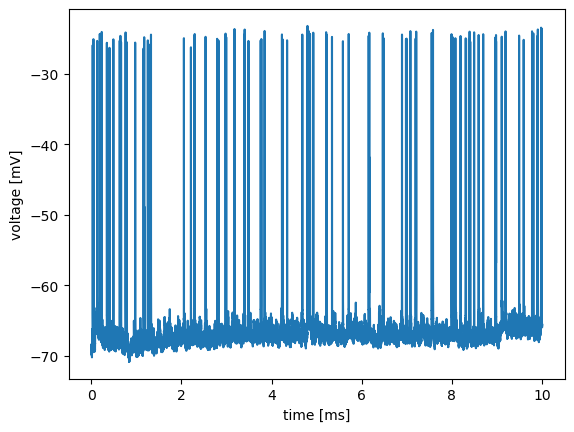

In [57]:
nixfile = nixio.File.open("intracellular_data.nix", nixio.FileMode.ReadOnly)
block = nixfile.blocks[0]
data_array = block.data_arrays[0]
voltage_data = data_array[:]
dimensions = data_array.dimensions[0]
time_axis = dimensions.axis(len(voltage_data))
time_axis_label = get_label(dimensions)
voltage_label = get_label(data_array)


nixfile.close()

import matplotlib.pyplot as plt


plt.plot(time_axis, voltage_data);
plt.xlabel(time_axis_label);
plt.ylabel(voltage_label);

## Exercise 3: Tagging a single segment in the data

1. Reopen the "intracellular_data.nix" file in ``ReadWrite`` mode.
2. Let's assume that a stimulus was presented in the time interval between 3 and 7.5 seconds.
3. Create a **Tag** that tags this segment in the "intracellular data"
4. Close the file again.

### Your solution


In [59]:
nixfile = nixio.File.open("intracellular_data.nix", nixio.FileMode.ReadWrite)
block = nixfile.blocks[0]
data_array = block.data_arrays[0]

# stim_tag = block.create_tag("stimulus", "nix.stimulus.onset", position=[3])
# stim_tag.extent = [7.5 - 3]
# stim_tag.references.append(data_array)

# voltage_data = data_array[:]
# time_axis = data_array.dimensions[0].axis(len(voltage_data))

nixfile.close()

## Exercise 4: Retrieving the tagged data

1. Reopen the file for read only access.
2. Find the **Tag** that annotates the stimulus segment.
3. Retrieve the tagged data for the "intracellular data"
4. If you feel like it, plot them.

### Your solution


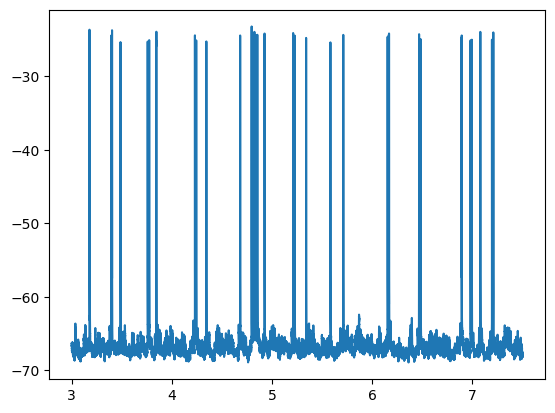

In [60]:
nixfile = nixio.File.open("intracellular_data.nix", nixio.FileMode.ReadOnly)
block = nixfile.blocks[0]
# data = block.create_data_array("response", "nix.sampled", data=voltage_data, label="voltage", unit="mV")

stimulus_tag = block.tags["stimulus"]
stimulus_response_data = stimulus_tag.tagged_data("voltage")[:]
time = stimulus_tag.references["voltage"].dimensions[0].axis(len(stimulus_response_data), start_position=stimulus_tag.position[0])

plt.plot(time, stimulus_response_data)
nixfile.close()

## Exercise 5: Exploring a NIX file from data and metadata
1. from the "resources/D1S3" folder open the NIX file "2010-04-28-af.nix" in ReadOnly mode
2. Identify how many Blocks, Groups, DataArrays, Tags and MultiTags have metadata attached to them
3. Select an Object with attached metdata and print the full metadata information
4. List the names and types of all main section categories
5. Identify the metadata section with name "Recording" and print the full metadata information
6. Identify how many Properties the Section has
7. Identify how many Subsections of section "2010-04-28-af" are referring to NIX objects and note which type they are.

### Your solution

## Exercise 6: Create a metadata tree
With this exercise you will need to get a bit imaginative. Come up with a small set of metadata terms, define a useful structure and store the information in a NIX file. \
As an example you can store information about hardware, software, stimulus, subject information or experimental conditions. \
If you have already conducted experiments of your own, select 4 main categories of metadata and store them in a Section-Property tree that makes sense from you point of view. \
If you have not conducted experiments yet, think about how to store metadata from the radar trap example; as an example save different radar trap machines in fictional locations, fictional recording dates and fictional car details. \
The main goal of this exercise is to make you think about how to structure the metadata you want to save.

### Your solution